In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import random
from sklearn import metrics
import matplotlib.colors as colors
import math

In [ ]:
def train_test_split(data, split):
  x_train_data = []
  y_train_data = []
  x_test_data = []
  y_test_data = []
  n = len(data)
  train_size = int(n*split)
  test_size = n - train_size

  random_indices = random.sample(range(0, n), train_size)
  for i in range(0, len(random_indices)):
    x_train_data.append(list(data.iloc[random_indices[i]][:-1]))
    y_train_data.append(data.iloc[random_indices[i]][-1:].iloc[0])

  for i in range(0, n):
    if i not in random_indices:
      x_test_data.append(list(data.iloc[i][:-1]))
      y_test_data.append(data.iloc[i][-1:].iloc[0])

  return x_train_data,y_train_data,x_test_data,y_test_data

In [ ]:
# Q2 : Naive Bayes Classifier
# Part 1 and Part2 with Covariance Matrix as Identity Matrix

In [ ]:
classification_data2 = pd.read_csv('drive/MyDrive/part2/train_45.csv')

In [ ]:
classification_data2.head()

,x,y,label
0,-9.783880,-5.680981,1
1,-0.492205,21.524646,2
2,-14.792189,-8.576520,1
3,-5.897910,31.104768,2
4,-14.019875,-5.762742,1


In [ ]:
x_train, y_train, x_validation, y_validation = train_test_split(classification_data2, 0.95)

In [ ]:
def prior_probabilities(y_train):
  res = []
  n = len(y_train)
  classes = len(np.unique(np.array(y_train)))
  count_arr = np.bincount(y_train)
  for i in range(0, len(count_arr)):
    res.append(count_arr[i]/n)

  return classes, res

In [ ]:
classes, prior_probab_data2 = prior_probabilities(y_train)

In [ ]:
def mean_features(x_train, y_train, classes):
  res = []
  for i in range(0, classes):
    res.append([0, 0])
  
  cnt = []
  for i in range(0,classes):
    cnt.append(0)
    
  for i in range(0, len(x_train)):
    val = y_train[i]
    res[int(val)][0]+=x_train[i][0]
    res[int(val)][1]+=x_train[i][1]
    cnt[int(val)]+=1

  for i in range(0, classes):
    res[i][0] = res[i][0]/cnt[i]
    res[i][1] = res[i][1]/cnt[i]

  return res

In [ ]:
arr = mean_features(x_train, y_train, classes)

In [ ]:
covariance_data2 = np.identity(2)

In [ ]:
def predict(x_test, mu, cov, prior_probabs):
  x = np.array(x_test)
  mu_temp = np.array(mu)
  res = []
  for i in range(0, len(mu)):
    res.append((1/(2*np.pi * np.sqrt(np.linalg.det(cov))))*np.exp(-0.5 * np.matmul(np.transpose(x - mu[i]), np.matmul(np.linalg.inv(cov), (x-mu[i])))))
  
  total = 0 
  for i in range(0, len(res)):
    total+=res[i]*prior_probabs[i]

  bayes = []
  for i in range(0, len(res)):
    bayes.append(res[i]*prior_probabs[i]/total)

  max1 = bayes.index(max(bayes))
  return max1

In [ ]:
y_validation_pred = []
for i in range(0, len(x_validation)):
  val = predict(x_validation[i],arr, covariance_data2, prior_probab_data2)
  y_validation_pred.append(val)

acc = 0 
for i in range(0, len(y_validation)):
  if y_validation[i]==y_validation_pred[i]:
    acc+=1

print(acc/len(y_validation))

1.0


In [ ]:
classification_testing2 = pd.read_csv('drive/MyDrive/part2/test_45.csv')

In [ ]:
def testing(test, mu, cov, prior):
  x_test = []
  y_test = []

  for i in range(0, len(test)):
    x_test.append(list(test.iloc[i][:-1]))
    y_test.append(test.iloc[i][-1:].iloc[0])

  y_pred = []
  for i in range(0, len(x_test)):
    val = predict(x_test[i], mu, cov, prior)
    y_pred.append(val)

  test_accuracy = 0 
  for i in range(0, len(y_test)):
    if y_test[i]==y_pred[i]:
      test_accuracy+=1

  return y_pred, y_test, test_accuracy/len(y_test)

In [ ]:
y_prediction_data2, y_test_data2, accuracy = testing(classification_testing2, arr, covariance_data2, prior_probab_data2)


In [ ]:
def confusion_matrix_plot(y_pred, y_actual):
  confusion_matrix = metrics.confusion_matrix(y_pred, y_actual)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
  cm_display.plot()
  plt.show()

Accuracy on Test Data :  1.0


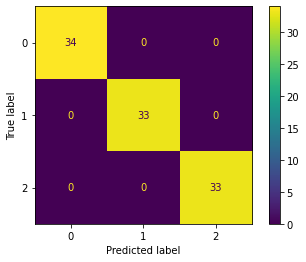

In [ ]:
print("Accuracy on Test Data : ", accuracy)
confusion_matrix_plot(y_prediction_data2, y_test_data2)

In [ ]:
def plot_classification_boundary(test, y_test, mu, covariance_data2, prior_probab_data2):
  x = list(test.x)
  y = list(test.y)
  if(len(prior_probab_data2)==3):
    colors_scatter = ['green', 'red', 'purple']

  else:
    colors_scatter = ["green", "red"]
  cmap = plt.cm.colors.ListedColormap(colors_scatter)
  N = 100
  X = np.linspace(min(x), max(x), N)
  Y = np.linspace(min(y), max(y), N)
  X, Y = np.meshgrid(X, Y)

  #fig = plt.figure(figsize = (10,10))
  #ax = fig.gca()
  # color_list = ['Blues','Greens','Reds']
  my_norm = colors.Normalize(vmin=-1.,vmax=1.)

  zz = np.array([predict(np.array([xx, yy]), mu, covariance_data2, prior_probab_data2) for xx,yy in zip(np.ravel(X), np.ravel(Y))])
  Z = zz.reshape(X.shape)
  # fig, ax = plt.subplots(1, 1)
  plt.figure(figsize=(12,8))

  # Create the scatter plot with different colors for each class
  plt.scatter(x, y, c=y_test, cmap=cmap)
  plt.contourf( X, Y, Z, 2, alpha = .1, colors = colors_scatter)
  plt.contour( X, Y, Z, 2, alpha = 1, colors = colors_scatter)

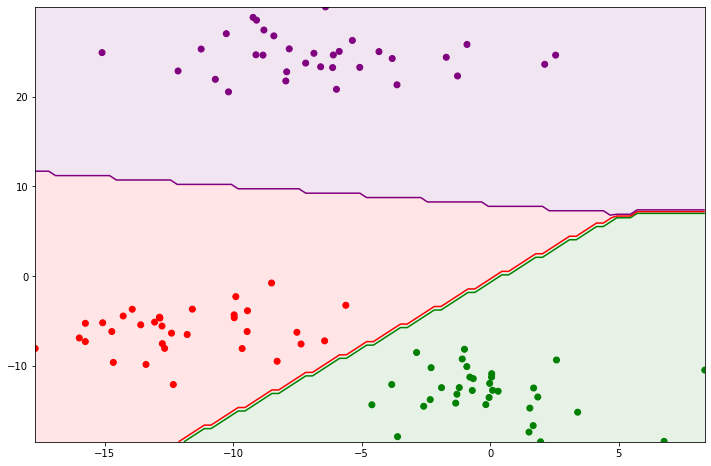

In [ ]:
plot_classification_boundary(classification_testing2, y_test_data2, arr, covariance_data2, prior_probab_data2)

1. Training Accuracy : 100%
2. Test Accuracy : 100%

In [ ]:
classification_data3 = pd.read_csv('drive/MyDrive/part3/train_45.csv')

In [ ]:
classification_data3.head()

,x,y,label
0,-0.919267,0.197394,0
1,0.871469,-0.509763,1
2,-0.958663,0.787518,0
3,-0.956978,0.364190,0
4,1.092379,-0.062092,0


In [ ]:
x_train, y_train, x_validation, y_validation = train_test_split(classification_data3, 0.95)

In [ ]:
classes, prior_probab_data3 = prior_probabilities(y_train)

In [ ]:
arr1 = mean_features(x_train, y_train, classes)

In [ ]:
covariance_data3 = np.identity(2)

In [ ]:
y_validation_pred = []
for i in range(0, len(x_validation)):
  val = predict(x_validation[i],arr1, covariance_data3, prior_probab_data3)
  y_validation_pred.append(val)

acc = 0 
for i in range(0, len(y_validation)):
  if y_validation[i]==y_validation_pred[i]:
    acc+=1

print(acc/len(y_validation))

0.8


In [ ]:
classification_testing3 = pd.read_csv('drive/MyDrive/part3/test_45.csv')

In [ ]:
y_prediction_data3, y_test_data3, accuracy = testing(classification_testing3, arr1, covariance_data3, prior_probab_data3)


Accuracy on Test Data :  0.77


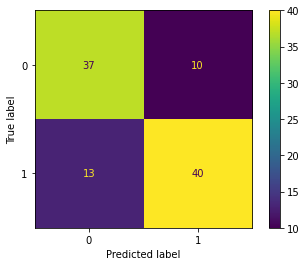

In [ ]:
print("Accuracy on Test Data : ", accuracy)
confusion_matrix_plot(y_prediction_data3, y_test_data3)

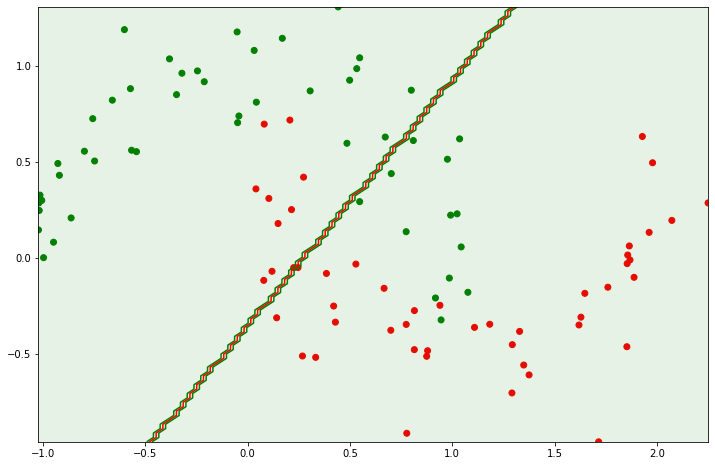

In [ ]:
plot_classification_boundary(classification_testing3, y_test_data3, arr1, covariance_data3, prior_probab_data3)

1. Training Accuracy : 80%
2. Test Accuracy : 77%

In [ ]:
# Part3 and Part4 with Covariance Matrix Same across all classes : 

In [ ]:
x_train, y_train, x_validation, y_validation = train_test_split(classification_data2, 0.95)

In [ ]:
classes, prior_probab_data2 = prior_probabilities(y_train)

In [ ]:
arr = mean_features(x_train, y_train, classes)

In [ ]:
covariance_data2 = np.cov(np.transpose(np.array(x_train)))

In [ ]:
y_validation_pred = []
for i in range(0, len(x_validation)):
  val = predict(x_validation[i],arr, covariance_data2, prior_probab_data2)
  y_validation_pred.append(val)

acc = 0 
for i in range(0, len(y_validation)):
  if y_validation[i]==y_validation_pred[i]:
    acc+=1

print(acc/len(y_validation))

1.0


In [ ]:
classification_testing2 = pd.read_csv('drive/MyDrive/part2/test_45.csv')

In [ ]:
y_prediction_data2, y_test_data2, accuracy = testing(classification_testing2, arr, covariance_data2, prior_probab_data2)


Accuracy on Test Data :  0.99


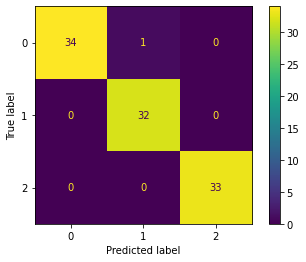

In [ ]:
print("Accuracy on Test Data : ", accuracy)
confusion_matrix_plot(y_prediction_data2, y_test_data2)

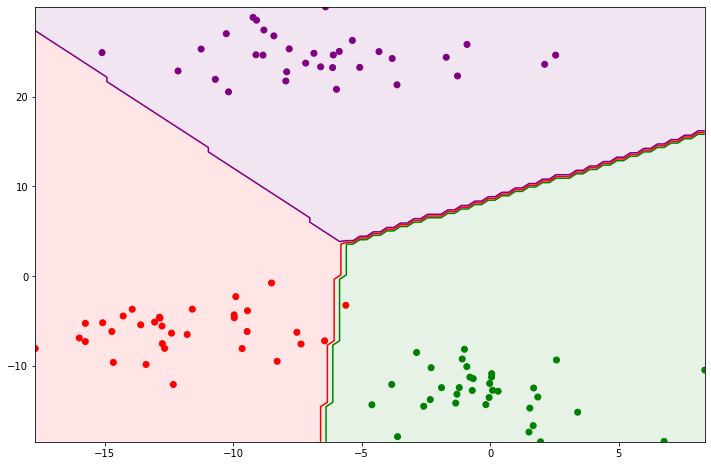

In [ ]:
plot_classification_boundary(classification_testing2, y_test_data2, arr, covariance_data2, prior_probab_data2)

1. Training Accuracy : 100%
2. Test Accuracy : 99%

In [ ]:
classification_data3 = pd.read_csv('drive/MyDrive/part3/train_45.csv')

In [ ]:
x_train, y_train, x_validation, y_validation = train_test_split(classification_data3, 0.95)

In [ ]:
classes, prior_probab_data3 = prior_probabilities(y_train)

In [ ]:
arr1 = mean_features(x_train, y_train, classes)

In [ ]:
covariance_data3 = np.cov(np.transpose(np.array(x_train)))

In [ ]:
y_validation_pred = []
for i in range(0, len(x_validation)):
  val = predict(x_validation[i],arr1, covariance_data3, prior_probab_data3)
  y_validation_pred.append(val)

acc = 0 
for i in range(0, len(y_validation)):
  if y_validation[i]==y_validation_pred[i]:
    acc+=1

print(acc/len(y_validation))

0.92


In [ ]:
classification_testing3 = pd.read_csv('drive/MyDrive/part3/test_45.csv')

In [ ]:
y_prediction_data3, y_test_data3, accuracy = testing(classification_testing3, arr1, covariance_data3, prior_probab_data3)


Accuracy on Test Data :  0.85


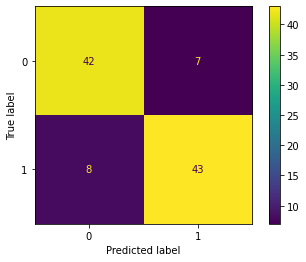

In [ ]:
print("Accuracy on Test Data : ", accuracy)
confusion_matrix_plot(y_prediction_data3, y_test_data3)

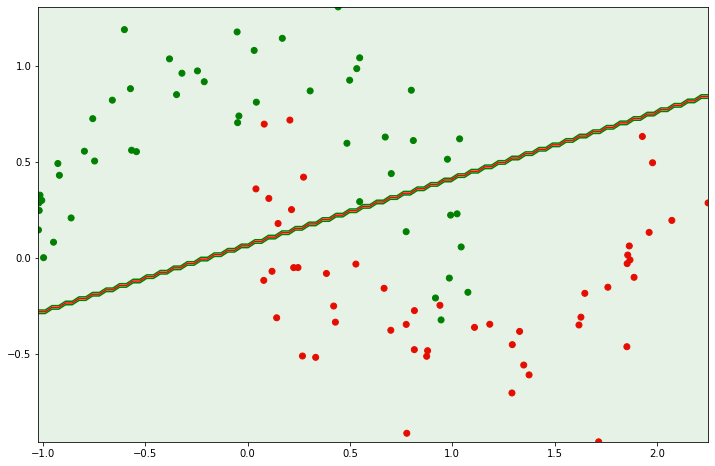

In [ ]:
plot_classification_boundary(classification_testing3, y_test_data3, arr1, covariance_data3, prior_probab_data3)

1. Training Accuracy : 92%
2. Test Accuracy : 85%

In [ ]:
# Part5 and Part6 with different covariances across all classes : 

In [ ]:
x_train, y_train, x_validation, y_validation = train_test_split(classification_data2, 0.95)

In [ ]:
classes, prior_probab_data2 = prior_probabilities(y_train)

In [ ]:
arr = mean_features(x_train, y_train, classes)

In [ ]:
covariance_data2 = []
for i in range(0, classes):
  x = []
  for j in range(0, len(x_train)):
    if y_train[j]==i:
      x.append(x_train[j])

  covariance_data2.append(np.cov(np.transpose(np.array(x))))

In [ ]:
def predict_different_covariance(x_test, mu, cov, prior_probabs):
  x = np.array(x_test)
  mu_temp = np.array(mu)
  res = []
  for i in range(0, len(mu)):
    res.append((1/(2*np.pi * np.sqrt(np.linalg.det(cov[i]))))*np.exp(-0.5 * np.matmul(np.transpose(x - mu[i]), np.matmul(np.linalg.inv(cov[i]), (x-mu[i])))))
  
  total = 0 
  for i in range(0, len(res)):
    total+=res[i]*prior_probabs[i]

  bayes = []
  for i in range(0, len(res)):
    bayes.append(res[i]*prior_probabs[i]/total)

  max1 = bayes.index(max(bayes))
  return max1

In [ ]:
y_validation_pred = []
for i in range(0, len(x_validation)):
  val = predict_different_covariance(x_validation[i],arr, covariance_data2, prior_probab_data2)
  y_validation_pred.append(val)

acc = 0 
for i in range(0, len(y_validation)):
  if y_validation[i]==y_validation_pred[i]:
    acc+=1

print(acc/len(y_validation))

1.0


In [ ]:
classification_testing2 = pd.read_csv('drive/MyDrive/part2/test_45.csv')

In [ ]:
def testing_different_covariance(test, mu, cov, prior):
  x_test = []
  y_test = []

  for i in range(0, len(test)):
    x_test.append(list(test.iloc[i][:-1]))
    y_test.append(test.iloc[i][-1:].iloc[0])

  y_pred = []
  for i in range(0, len(x_test)):
    val = predict_different_covariance(x_test[i], mu, cov, prior)
    y_pred.append(val)

  test_accuracy = 0 
  for i in range(0, len(y_test)):
    if y_test[i]==y_pred[i]:
      test_accuracy+=1

  return y_pred, y_test, test_accuracy/len(y_test)

In [ ]:
y_prediction_data2, y_test_data2, accuracy = testing_different_covariance(classification_testing2, arr, covariance_data2, prior_probab_data2)


Accuracy on Test Data :  1.0


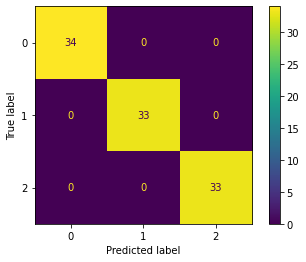

In [ ]:
print("Accuracy on Test Data : ", accuracy)
confusion_matrix_plot(y_prediction_data2, y_test_data2)

In [ ]:
def plot_classification_boundary_different_covariance(test, y_test, mu, covariance_data2, prior_probab_data2):
  x = list(test.x)
  y = list(test.y)
  if(len(prior_probab_data2)==3):
    colors_scatter = ['green', 'red', 'purple']

  else:
    colors_scatter = ["green", "red"]
  cmap = plt.cm.colors.ListedColormap(colors_scatter)
  N = 100
  X = np.linspace(min(x), max(x), N)
  Y = np.linspace(min(y), max(y), N)
  X, Y = np.meshgrid(X, Y)

  #fig = plt.figure(figsize = (10,10))
  #ax = fig.gca()
  # color_list = ['Blues','Greens','Reds']
  my_norm = colors.Normalize(vmin=-1.,vmax=1.)

  zz = np.array([predict_different_covariance(np.array([xx, yy]), mu, covariance_data2, prior_probab_data2) for xx,yy in zip(np.ravel(X), np.ravel(Y))])
  Z = zz.reshape(X.shape)
  # fig, ax = plt.subplots(1, 1)
  plt.figure(figsize=(12,8))

  # Create the scatter plot with different colors for each class
  plt.scatter(x, y, c=y_test, cmap=cmap)
  plt.contourf( X, Y, Z, 2, alpha = .1, colors = colors_scatter)
  plt.contour( X, Y, Z, 2, alpha = 1, colors = colors_scatter)

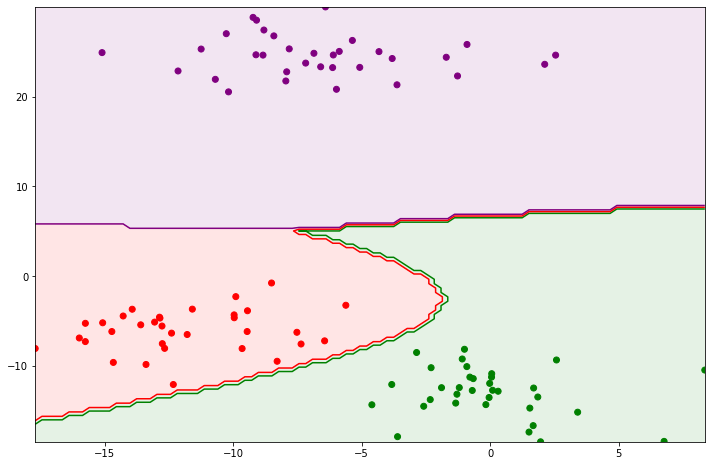

In [ ]:
plot_classification_boundary_different_covariance(classification_testing2, y_test_data2, arr, covariance_data2, prior_probab_data2)

1. Training Accuracy : 100%
2. Test Accuracy : 100%

In [ ]:
classification_data3 = pd.read_csv('drive/MyDrive/part3/train_45.csv')

In [ ]:
x_train, y_train, x_validation, y_validation = train_test_split(classification_data3, 0.95)

In [ ]:
classes, prior_probab_data3 = prior_probabilities(y_train)

In [ ]:
arr1 = mean_features(x_train, y_train, classes)

In [ ]:
covariance_data3 = []
for i in range(0, classes):
  x = []
  for j in range(0, len(x_train)):
    if y_train[j]==i:
      x.append(x_train[j])

  covariance_data3.append(np.cov(np.transpose(np.array(x))))

In [ ]:
y_validation_pred = []
for i in range(0, len(x_validation)):
  val = predict_different_covariance(x_validation[i],arr1, covariance_data3, prior_probab_data3)
  y_validation_pred.append(val)

acc = 0 
for i in range(0, len(y_validation)):
  if y_validation[i]==y_validation_pred[i]:
    acc+=1

print(acc/len(y_validation))

0.84


In [ ]:
classification_testing3 = pd.read_csv('drive/MyDrive/part3/test_45.csv')

In [ ]:
y_prediction_data3, y_test_data3, accuracy = testing_different_covariance(classification_testing3, arr1, covariance_data3, prior_probab_data3)


Accuracy on Test Data :  0.85


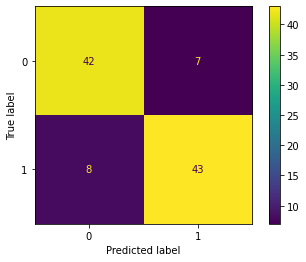

In [ ]:
print("Accuracy on Test Data : ", accuracy)
confusion_matrix_plot(y_prediction_data3, y_test_data3)

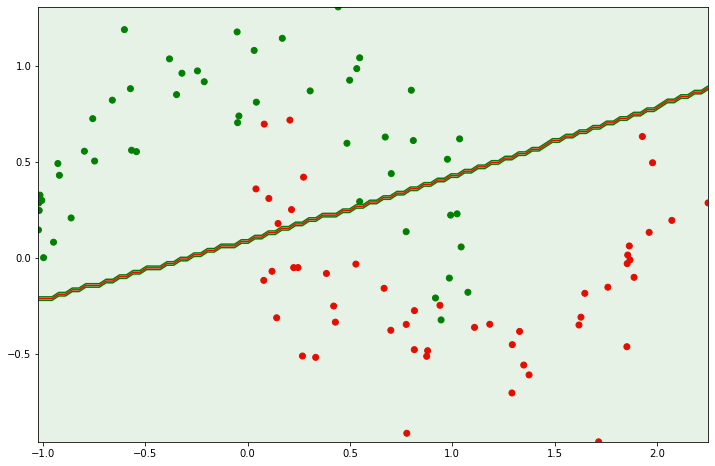

In [ ]:
plot_classification_boundary_different_covariance(classification_testing3, y_test_data3, arr1, covariance_data3, prior_probab_data3)

1. Training Accuracy : 84%
2. Test Accuracy : 85%